# Chapter 1 Introduction
## 1.1 Example: Polynomial Curve Fitting
Now suppose that we are given a training set comprising $N$ observations of $x$, written $\mathbf{x} = (x_1,\cdots,x_N)^T$, together with corresponding observations of the values of t, denoted $\mathbf{t} = (t_1,\cdots,t_N)^T$. Our goal is to exploit this training set in order to make predictions of the value $\hat{t}$ of the target variable for some new value $\hat{x}$ of the input variable. For a given $\hat{x}$, there is uncertainty as to the appropriate value for $\hat{t}$.

Loss function without regularization
$$E(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^N \{y(x_n,\mathbf{w}) - t_n\}^2$$

Loss function with regularization
$$\tilde{E}(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^N \{y(x_n,\mathbf{w}) - t_n\}^2 + \frac{\lambda}{2}||\mathbf{w}||^2$$
The particular case of a quadratic regularizer is called *ridge regression*. In the context of neural networks, this approach is known as *weight decay*.
## 1.2 Probability Theory
**The Rules of Probability**

**sum rule** 
$$P(X) = \sum_Y p(X,Y)$$
**product rule**
$$P(X,Y) = p(Y|X)p(X)$$

**Bayes' theorem**
$$p(Y|X) = \frac{p(X|Y)}{p(X)}p(Y)$$
where the denominator can be expressed in terms of the quantities appearing in the numerator
$p(X) = \sum_Y p(X|Y)p(Y)$.

**Independent** 
$$P(X,Y) = P(X)P(Y)\text{    or    } P(Y|X) = P(Y)$$ 

### Expectation
$\mathbb{E}[f] = \int p(x)f(x)dx$ (wenzhe: population, action)

$\mathbb{E}_x[f(x,y)]$ is a function of $y$, which denotes the average of the function $f(x,y)$ with respect to the distribution of x

$\mathbb{E}_x[f|y] = \int p(x|y)f(x) dx$ conditional expection

### Variance
$\mathbb{var}[f] = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2] = \mathbb{E}[f(x)^2] - \mathbb{E}[f(x)]^2$
### Covariance
$\mathbb{cov}[x,y] = \mathbb{E}_{x,y}[(x-\mathbb{E}[x])(y - \mathbb{E}[y])]$

### Bayesian probabilities
Bayesian view provides a quantification of uncertainty. We capture our assumptions about $\mathbf{w}$, before observing the data, in the form of a prior probability distribution $p(\mathbf{w})$. The effect of the observed data $\mathcal{D} = \{t_1,\cdots,t_N\}$ is expressed through the conditional probability $p(\mathcal{D}|\mathbf{w})$.
$$p(\mathbf{w}|\mathcal{D}) = \frac{p(\mathcal{D}|\mathbf{w})p(\mathbf{w})}{p(\mathcal{D})}$$

which allows us to evaluate the uncertainty in $\mathbf{w}$ after we observed $\mathcal{D}$ in the form of the posterior probability $p(\mathbf{w}|\mathcal{D})$. The likelihood function $p(\mathcal{D}|\mathbf{w})$ expresses how probable the observed data set is for different settings of the parameter vector $\mathbf{w}$.

Now suppose that we have a data set of observations $\mathbf{x} = (x_1,\cdots,x_N)^T$ and this set is i.i.d., the maximum likelihood solution is given by the sample mean, and sample variance (measured with respect to the sample mean)
$$\mu_{ML}\frac{1}{N}\sum_{n=1}^Nx_n$$
$$\sigma_{ML}^2 = \frac{1}{N}\sum_{n=1}^N(x_n-\mu_{ML})^2$$
which random variables depending on the data set. Their expectations are given below.
$$\mathbb{E}[\mu_{ML}] = \mu$$
$$\mathbb{E}[\sigma_{ML}^2] = \frac{N-1}{N}\sigma^2$$. The unbiased variance estimator is 
$$\tilde{\sigma}^2 = \frac{N}{N-1}\sigma_{ML}^2$$

We assume that, given the value of $x$, the corresponding value of $t$ has a Gaussian distribution with a mean equal to the value $y(x,\mathbf{w})$ of the polynomial curve given by
$$p(t|x,\mathbf{w},\beta) = \mathcal{N}(t|y(x,\mathbf{w}),\beta^{-1})$$

which is a probabilistic model, expressed in terms of the *predictive distribution*. This model gives the probability distribution over t, rather than simply a point estimate.
$$p(t|x,\mathbf{w}_{ML},\beta_{ML}) = \mathcal{N}(t|y(x,\mathbf{w}_{ML}),\beta_{ML}^{-1})$$ 

Given the Gaussian prior $p(\mathbf{w}|\alpha) = \mathcal{N}(\mathbf{w}|\mathbf{0},\alpha^{-1}\mathbf{I})$, maximizing the posterior distribution is equivalent to minimizing the regularized sum-of-squares error function with a regularization parameter given by $\lambda = \alpha/\beta$.

### Bayesian curve fitting
Although we have included a prior distribution $p(\mathbf{w}|\alpha)$, we so far still making a point estimate of $\mathbf{w}$ and so this does not yet amount to a Bayesian treatment. In a fully Bayesian approach, we should consistently apply the sum and product rules of probability, which requires that we integrate over all values of $\mathbf{w}$. Such merginalizations lie at the heart of Bayesian methods for pattern recognition.

The predictive distribution is given as follows ($\mathbf{x}$ and $\mathbf{t}$ are observed data, $x$ is a new data, $t$ is the prediction for $x$)
$$p(t|x,\mathbf{x},\mathbf{t}) = \int p(t|x,\mathbf{w})p(\mathbf{w}|\mathbf{x},\mathbf{t})d\mathbf{w}$$

where $p(t|x,\mathbf{w}) = \mathcal{N}(t|y(x,\mathbf{w}),\beta^{-1})$, $p(\mathbf{w}|\mathbf{w},\mathbf{t})$ is found by normalizing $p(\mathbf{t}|\mathbf{x},\mathbf{w},\beta)p(\mathbf{w}|\alpha)$. (wenzhe: randomness comes from the observed data ($\mathbf{x}$, $\mathbf{t}$)) and the prediction distribution ($t$).

We see that the variance, as well as the mean, of the predictive distribution is dependent on $x$. The first term in represents the uncertainty in the predicted value of $t$ due to the noise on the target variables and was expressed already in the maximum likelihood predictive distribution through $\beta_{ML}^{-1}$. However, the second term arises from the uncertainty in the parameters $\mathbf{w}$ and is a consequence of the Bayesian treatment. 

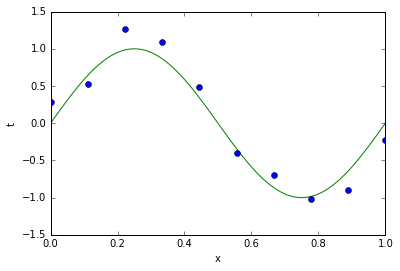

In [12]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
def fig1d2(N = 10,scale = 0.25):
    tx = np.linspace(0,1,100)
    ty = np.sin(2*np.pi*tx)
    plt.plot(tx,ty,'g-')
    x = np.linspace(0,1,N)
    y = np.sin(2*np.pi*x) + np.random.normal(scale = scale, size = N)
    plt.plot(x,y,'bo')
    plt.ylim([-1.5,1.5])
    plt.xlabel('x')
    plt.ylabel('t')
    plt.show()
fig1d2()

## 1.3 Model Selection
## 1.4 The Curse of Dimensionality
In this book, we shall make extensive use of illustrative examples involving input spaces of one or two dimensions, because this makes it particularly easy to illustrate the techniques graphically. The reader should be warned, however, that not all intuitions developed in spaces of low dimensionality will generalize to spaces of many dimensions.
## 1.5 Decision Theory
Here we turn to a discussion of decision theory that, when combined with probability theory, allows us to make optimal decisions in situations involving uncertainty such as those encountered in pattern recognition. Determination of $p(\mathbf{x},\mathbf{t})$ from a set of training data is an example of *inference*. 

For **cancer diagnosis** example, the general inference problem then involves determining the joint distribution $p(\mathbf{x}, \mathcal{C}_k)$, which gives us the most complete probabilistic description of the situation. Although this can be a very useful and informative quantity, in the end we must decide either to give treatment to the patient or not, and we would like this choice to be optimal in some appropriate sense. This is the *decision* step.
$$p(\mathcal{C}_k|\mathbf{x}) = \frac{p(\mathbf{x}|\mathcal{C}_k)}{p(\mathbf{x})}p(\mathcal{C}_k)$$

For many applications, our objective will be more complex than simply minimizing the number of misclassifications. The optimal solution is the one which minimizes the loss function.
$$\mathbb{E}[L] = \sum_k\sum_j \int_{\mathcal{R}_j} L_{kj}p(\mathbf{x},\mathcal{C}_k)d\mathbf{x}$$
The decision rule that minimizes the expected loss is the one that assigns each new $\mathbf{x}$ to the class $j$ for which the quantity
$$\sum_k L_{kj}p(\mathcal{C}_k|\mathbf{x})$$
is minimum. Hence finding $p(\mathcal{C}_k|\mathbf{x})$ is necessary.

### Inference and decision
We have broken the classification problem down into two separate stages, the *inference stage* in which we use training data to learn a model for $p(\mathcal{C}_k|\mathbf{x})$, and the subsequent *decision* stage in which we use these posterior probabilities to make optimal class assignments. An alternative possibility would be to solve both problems together and simply learn a function that maps inputs $\mathbf{x}$ directly into decisions. Such a function is called a *discriminant function*.

**generative models** explicitly or implicitly model the distribution of inputs as well as outputs ($p(\mathbf{x},\mathcal{C}_k)$).

**discriminative models** models the posterior probabilities directly ($p(\mathcal{C}_k | \mathbf{x})$), followed by the decision problem.

**discriminant function** maps each input $\mathbf{x}$ directly onto a class label. With this approach, however, we no longer have access to the posterior probabilities $p(\mathcal{C}_k|\mathbf{x})$, which is needed by minimizing risk, reject option, conpensating for class priors, combining models.

### Loss functions for regression
For regression problem, the decision stage consists of choosing a specific estimate $y(\mathbf{x})$ of the value of $t$ for each input $x$. The expected loss is give by
$$\mathbb{E}[L] = \iint L(t,y(\mathbf{x}))p(\mathbf{x},t)d\mathbf{x}dt$$
A common choice of loss function is the squared loss given by $L(t,y(\mathbf{x})) = \{y(\mathbf{x})-t\}^2$. The estimate that minimizes the expected loss is $\mathbb{E}_t[t|\mathbf{x}]$. Inserting back to the expected loss gives
$$\mathbb{E}[L] = \int\{y(\mathbf{x})-\mathbb{E}[t|\mathbf{x}]\}^2p(\mathbf{x})d\mathbf{x} + \int\{\mathbb{E}[t|\mathbf{x}]-t\}^2p(\mathbf{x})d\mathbf{x}$$
where the second term represents the intrinsic variability of the target data and can be regarded as noise (irreducible loss).
## 1.6 Information Theory
The average amount of information that they transmit in the process (entropy) is given by
$$H[x] = -\sum_x p(x)\log_2p(x)$$
which is also a lower bound on the number of bits needed to transmit the state of a random variable. For continuous RV, the entropy differential is given by
$$H[x] = -\int p(\mathbf{x})\ln p(\mathbf{x})d\mathbf{x}$$

The distribution that maximizes the differential entropy is the Gaussian. The differential entropy, unlike the discrete entropy, can be negative.

The additional information needed to specify the corresponding value of $\mathbf{y}$, given the value of $\mathbf{x}$ is given by
$$H[\mathbf{y}|\mathbf{x}] = -\iint p(\mathbf{y},\mathbf{x})\ln p(\mathbf{y}|\mathbf{x})d\mathbf{y}d\mathbf{x}$$
$$H[\mathbf{x},\mathbf{y}] = H[\mathbf{y}|\mathbf{x}] + H[\mathbf{x}]$$

Consider some unknown distribution $p(\mathbf{x})$, and suppose that we have modelled this using an approximating distribution $q(\mathbf{x})$. If we use $q(\mathbf{x})$ to construct a coding scheme for the purpose of transmitting values of $\mathbf{x}$ to a receiver, then the average *additional* amount of information required to specify the value of $\mathbf{x}$ as a result of using $q(\mathbf{x})$ instead of the true distribution $p(\mathbf{x})$ is given by (Kullback-Leibler divergence / relative entropy)
$$KL(p||q) = -\int p(\mathbf{x})\ln\frac{q(\mathbf{x})}{p(\mathbf{x})}$$
Properties $KL(p||q) \neq KL(q||p) \geq 0$
KL divergence is a measure of the dissimilarity of the two distribution $p(\mathbf{x})$ and $q(\mathbf{x})$.

The mutual information is given by
$$I[\mathbf{x},\mathbf{y}] = \text{KL}(p(\mathbf{x},\mathbf{y})||p(\mathbf{x})p(\mathbf{y})) = H[\mathbf{x}] - H[\mathbf{x}|\mathbf{y}] = H[\mathbf{y}] - H[\mathbf{y}|\mathbf{x}]$$

From a Bayesian perspective, the mutual information represents the reduction in uncertainty about $\mathbf{x}$ as a consequence of the new observation $\mathbf{y}$.